In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Gold.csv')
df.head(5)

,Date,Open,Close,High,Low
0,3/26/2024,2172.68,2179.12,2199.88,2167.97
1,3/25/2024,2166.82,2172.30,2181.00,2163.97
2,3/24/2024,0.00,2165.99,2167.89,2165.30
3,3/23/2024,2165.40,2165.40,2165.40,2165.40
4,3/22/2024,2181.34,2165.40,2186.05,2157.45


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df.head(5)

,Date,Open,Close,High,Low
1693,2019-03-01,1314.460,1292.765,1315.105,1290.355
1692,2019-03-02,1292.765,1292.765,1292.765,1292.765
1691,2019-03-03,1292.765,1292.765,1292.765,1292.765
1690,2019-03-04,1295.910,1286.710,1297.105,1283.160
1689,2019-03-05,1287.410,1287.775,1289.550,1281.460


In [4]:
df1=df.reset_index()['Close']
df1

0       1292.765
1       1292.765
2       1292.765
3       1286.710
4       1287.775
          ...   
1689    2165.400
1690    2165.400
1691    2165.990
1692    2172.300
1693    2179.120
Name: Close, Length: 1694, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\admin\anaconda3\envs\py39env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0701
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0082
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0026
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0011
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0010
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.9218e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.6957e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.3379e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.2510e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.8736e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8884e-04
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.9850e-04
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.8024e-04
Epoch 15/100
17/17 ━━━━━━

In [12]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [13]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [14]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, ytest)
print('Testing MAPE:', test_mape)

#MSE
test_mse = mean_squared_error(y_pred, ytest)
print('Testing MSE:', test_mse)

Testing RMSE: 1968.322260293326
Testing MAPE: 0.9996176594852614
Testing MSE: 3874281.3254560195


In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.80269443 0.80269443 0.81208738 0.82621437 0.81722935 0.83225806
 0.84015887 0.84015887 0.84015887 0.84015887 0.84307874 0.86634104
 0.85328753 0.85293328 0.85030326 0.85030326 0.84637432 0.82754549
 0.82962804 0.83216145 0.83216145 0.83216145 0.81395524 0.81544737
 0.81071333 0.81435242 0.83557512 0.83557512 0.83557512 0.84175836
 0.81355805 0.78981268 0.80777199 0.81480328 0.81480328 0.81480328
 0.80626912 0.81433095 0.79822876 0.8053674  0.80302721 0.80302721
 0.80253341 0.81746551 0.82266116 0.82491546 0.84176909 0.82459342
 0.82459342 0.82459342 0.80965058 0.82175943 0.82065375 0.81982717
 0.80921046 0.80921046 0.80921046 0.80451935 0.77567495 0.77416134
 0.78726853 0.79735924 0.79735924 0.79735924 0.80111642 0.80883474
 0.8107348  0.80933927 0.82158768 0.82158768 0.82158768 0.81653159
 0.81572648 0.82004187 0.83060491 0.87273898 0.87273898 0.87273898
 0.90585583 0.92034781 0.94217165 0.9547421  0.97386077 0.97386077
 0.97424722 0.9775106  0.9537867  0.97085503 0.956

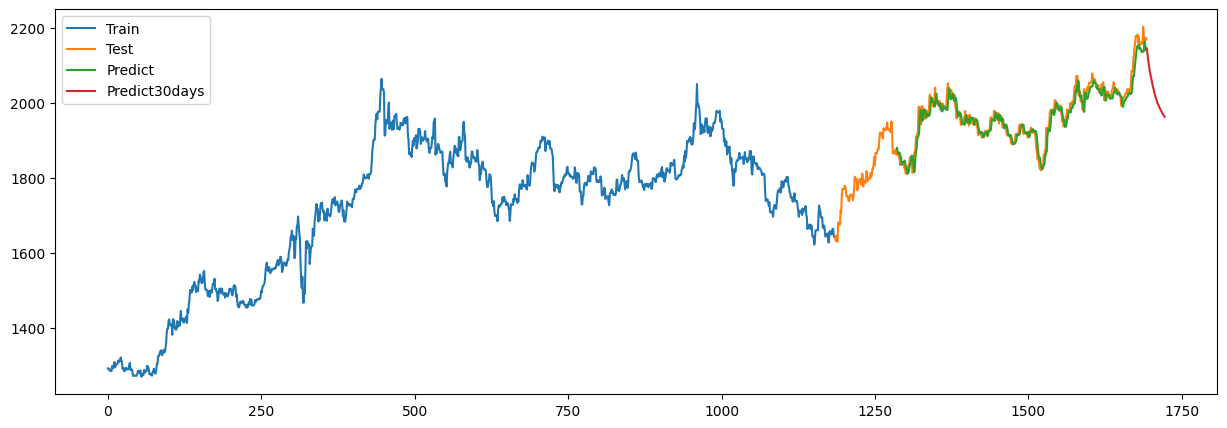

In [16]:
# 14.Vẽ hình
plt.figure(figsize=(15,5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()